## Arbitrary Imputation ==> Feature-Engine

[Feature Engineering for Machine Learning Course](https://www.trainindata.com/p/feature-engineering-for-machine-learning)

Feature-engine is an open source Python package originally designed to support this course, but has increasingly gained popularity and now supports transformations beyond those taught in the course. It was launched in 2017, and since then, several releases have appeared and a growing international community is beginning to lead the development.

- Feature-engine works like to Scikit-learn, so it is easy to learn
- Feature-engine allows you to implement specific engineering steps to specific feature subsets
- Feature-engine can be integrated with the Scikit-learn pipeline allowing for smooth model building

**Feature-Engine allows you to design and store a feature engineering pipeline with different procedures for different variable groups.**

- Make sure you have installed feature-engine before running this notebook.

## Dataset

We will use Feature-engine to perform arbitrary value imputation using the Ames House Price Dataset.

- To download the dataset visit the lecture **Datasets** in **Section 2** of the course.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# to split the datasets
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# from feature-engine
from feature_engine.imputation import ArbitraryNumberImputer

In [2]:
# let's load the dataset with a selected group of variables

cols_to_use = [
    "BsmtQual",
    "FireplaceQu",
    "LotFrontage",
    "MasVnrArea",
    "GarageYrBlt",
    "SalePrice",
]

data = pd.read_csv("../../Datasets/houseprice.csv", usecols=cols_to_use)

data.head()

,LotFrontage,MasVnrArea,BsmtQual,FireplaceQu,GarageYrBlt,SalePrice
0,65.0,196.0,Gd,NaN,2003.0,208500
1,80.0,0.0,Gd,TA,1976.0,181500
2,68.0,162.0,Gd,TA,2001.0,223500
3,60.0,0.0,TA,Gd,1998.0,140000
4,84.0,350.0,Gd,TA,2000.0,250000


In [3]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop("SalePrice", axis=1),  # just the features
    data["SalePrice"],  # the target
    test_size=0.3,  # the percentage of obs in the test set
    random_state=0,  # for reproducibility
)

X_train.shape, X_test.shape

((1022, 5), (438, 5))

In [4]:
X_train.isnull().mean()

LotFrontage    0.184932
MasVnrArea     0.004892
BsmtQual       0.023483
FireplaceQu    0.467710
GarageYrBlt    0.052838
dtype: float64

All the predictor variables contain missing data.

## Capture numerical variables automatically

In [5]:
# we call the imputer from Feature-engine
# pecifying the arbitrary value

imputer = ArbitraryNumberImputer(arbitrary_number=-999)

In [6]:
# we fit the imputer

imputer.fit(X_train)

ArbitraryNumberImputer(arbitrary_number=-999)

In [7]:
# we see that the imputer found the numerical variables

imputer.variables_

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [8]:
# here we can see the arbitrary value

imputer.arbitrary_number

-999

In [9]:
# Feature-engine returns a dataframe

X_train_t = imputer.transform(X_train)
X_test_t = imputer.transform(X_test)

X_train_t.head()

,LotFrontage,MasVnrArea,BsmtQual,FireplaceQu,GarageYrBlt
64,-999.0,573.0,Gd,NaN,1998.0
682,-999.0,0.0,Gd,Gd,1996.0
960,50.0,0.0,TA,NaN,-999.0
1384,60.0,0.0,TA,NaN,1939.0
1100,60.0,0.0,TA,NaN,1930.0


In [10]:
# let's check that the numerical variables don't
# contain NA any more

X_train_t[imputer.variables_].isnull().mean()

LotFrontage    0.0
MasVnrArea     0.0
GarageYrBlt    0.0
dtype: float64

## Specify variable groups

In [11]:
# let's do it imputation but this time
# and let's do it over 2 of the 3 numerical variables

imputer = ArbitraryNumberImputer(
    arbitrary_number=-999, variables=["LotFrontage", "MasVnrArea"]
)

imputer.fit(X_train)

ArbitraryNumberImputer(arbitrary_number=-999,
                       variables=['LotFrontage', 'MasVnrArea'])

In [12]:
# now the imputer uses only the variables we indicated

imputer.variables_

['LotFrontage', 'MasVnrArea']

In [13]:
# and we can see the value assigned to each variable
imputer.arbitrary_number

-999

In [14]:
# Feature-engine returns a dataframe

X_train_t = imputer.transform(X_train)
X_test_t = imputer.transform(X_test)

# let's check null values are gone
X_train_t[imputer.variables_].isnull().mean()

LotFrontage    0.0
MasVnrArea     0.0
dtype: float64

## Impute different variables with different numbers

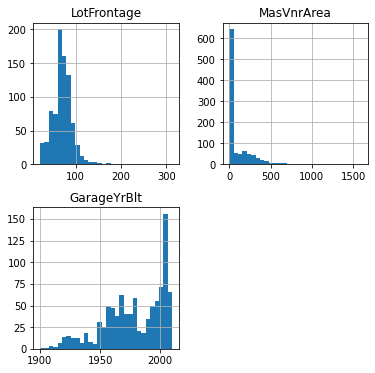

In [15]:
# let's look at the distributions to determine the
# arbitraty values to use

X_train.hist(bins=30, figsize=(6, 6))
plt.show()

In [16]:
imputer = ArbitraryNumberImputer(
    imputer_dict={
        "LotFrontage": -999,
        "MasVnrArea": -999,
        "GarageYrBlt": -1,
    }
)

imputer.fit(X_train)

ArbitraryNumberImputer(imputer_dict={'GarageYrBlt': -1, 'LotFrontage': -999,
                                     'MasVnrArea': -999})

In [17]:
# now the imputer uses only the variables we indicated

imputer.variables_

dict_keys(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'])

In [18]:
imputer.imputer_dict_

{'LotFrontage': -999, 'MasVnrArea': -999, 'GarageYrBlt': -1}

In [19]:
# Feature-engine returns a dataframe

X_train_t = imputer.transform(X_train)
X_test_t = imputer.transform(X_test)

# let's check null values are gone
X_train_t[imputer.variables_].isnull().mean()

LotFrontage    0.0
MasVnrArea     0.0
GarageYrBlt    0.0
dtype: float64

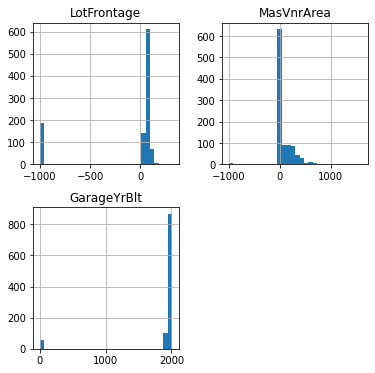

In [20]:
# let's check the histograms of the variables
# after the imputation

X_train_t[imputer.variables_].hist(bins=30, figsize=(6, 6))
plt.show()